In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('po1_data.txt', header=None)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1040 non-null   int64  
 1   1       1040 non-null   float64
 2   2       1040 non-null   float64
 3   3       1040 non-null   float64
 4   4       1040 non-null   float64
 5   5       1040 non-null   float64
 6   6       1040 non-null   float64
 7   7       1040 non-null   float64
 8   8       1040 non-null   float64
 9   9       1040 non-null   float64
 10  10      1040 non-null   float64
 11  11      1040 non-null   float64
 12  12      1040 non-null   float64
 13  13      1040 non-null   float64
 14  14      1040 non-null   float64
 15  15      1040 non-null   float64
 16  16      1040 non-null   float64
 17  17      1040 non-null   float64
 18  18      1040 non-null   float64
 19  19      1040 non-null   float64
 20  20      1040 non-null   int64  
 21  21      1040 non-null   int64  
 22  

In [5]:
# stats of rows without PD
df[df[28] == 0].describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.0,520.0
mean,30.500000,2.507421,0.000153,1.138244,1.222062,3.414746,12.869006,1.183479,5.754319,8.092812,...,251.810481,103.590385,98.934615,0.006393,0.000885,30.241529,1.263462,14.281812,1.0,0.0
std,5.771834,1.831170,0.000096,1.027124,1.234842,3.081448,6.108741,0.468361,3.467099,5.877320,...,130.511785,114.500269,113.041041,0.001872,0.000708,20.994251,1.739768,16.231924,0.0,0.0
min,21.000000,0.190000,0.000006,0.084000,0.081000,0.252000,1.185000,0.103000,0.496000,0.708000,...,100.010000,5.000000,4.000000,0.002039,0.000057,0.000000,0.000000,0.000000,1.0,0.0
25%,25.750000,1.381750,0.000087,0.528000,0.578250,1.584000,8.768000,0.887000,3.486500,4.820000,...,148.153000,42.750000,40.000000,0.005035,0.000428,11.111000,0.000000,0.000000,1.0,0.0
50%,30.500000,2.214000,0.000134,0.907000,0.967500,2.720000,11.785000,1.138000,4.886500,6.644000,...,202.064500,62.000000,58.500000,0.006147,0.000663,29.992000,1.000000,8.863500,1.0,0.0
75%,35.250000,3.052000,0.000202,1.401000,1.467250,4.204000,15.544000,1.412500,7.114000,9.685750,...,323.134000,118.000000,111.250000,0.007754,0.001053,47.219500,2.000000,25.478000,1.0,0.0
max,40.000000,14.376000,0.000777,8.016000,13.542000,24.048000,39.874000,2.721000,25.820000,72.860000,...,526.410000,805.000000,798.000000,0.010837,0.004075,85.000000,12.000000,69.117000,1.0,0.0


In [6]:
# stats of rows with PD
df[df[28] == 1].describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.0
mean,10.500000,2.851624,0.000188,1.355861,1.474592,4.067577,12.967775,1.206312,5.644882,7.874292,...,217.941499,115.898077,113.003846,0.006700,0.000800,25.124183,1.005769,10.458273,25.000000,1.0
std,5.771834,1.680561,0.000113,0.917514,1.019404,2.752582,4.710492,0.365562,2.484632,3.513804,...,109.384758,178.532336,178.371805,0.001868,0.000736,20.661467,1.469656,13.762673,14.738308,0.0
min,1.000000,0.195000,0.000010,0.062000,0.091000,0.185000,2.171000,0.229000,0.565000,1.025000,...,85.541000,0.000000,0.000000,0.002211,0.000055,0.000000,0.000000,0.000000,5.000000,1.0
25%,5.750000,1.704500,0.000104,0.753250,0.800750,2.259250,10.140500,0.998500,3.990500,5.459500,...,141.537000,42.750000,41.000000,0.005085,0.000385,5.634000,0.000000,0.000000,11.750000,1.0
50%,10.500000,2.625500,0.000169,1.178500,1.255500,3.536000,12.805000,1.225500,5.262500,7.456000,...,187.379500,67.000000,65.000000,0.006668,0.000618,22.902000,1.000000,3.279500,23.500000,1.0
75%,15.250000,3.647250,0.000258,1.779750,1.930750,5.339750,15.332750,1.405250,6.807000,9.511810,...,243.293750,111.250000,109.000000,0.007986,0.000895,38.912500,1.000000,18.685000,34.000000,1.0
max,20.000000,10.439000,0.000713,6.125000,7.205000,18.375000,41.137000,2.689000,16.641000,31.750000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,11.000000,60.298000,55.000000,1.0


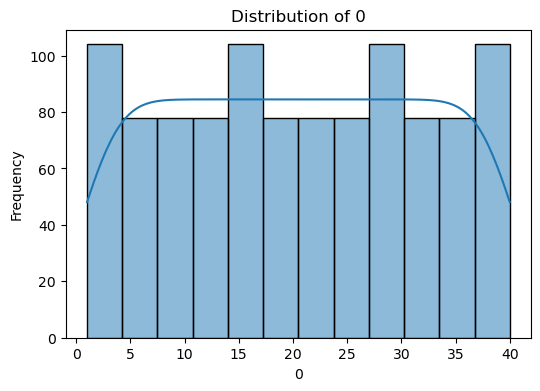

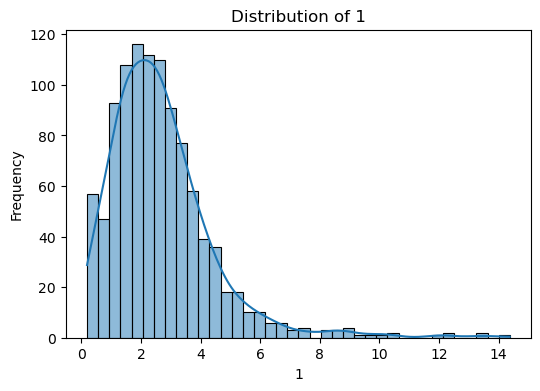

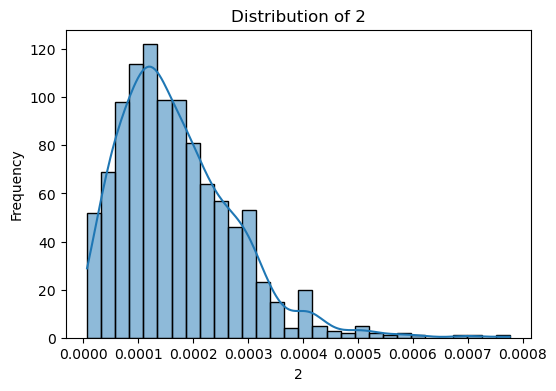

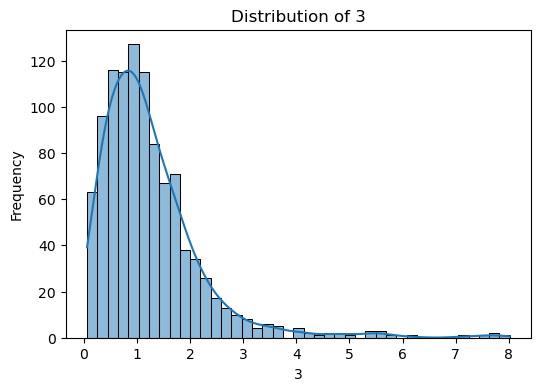

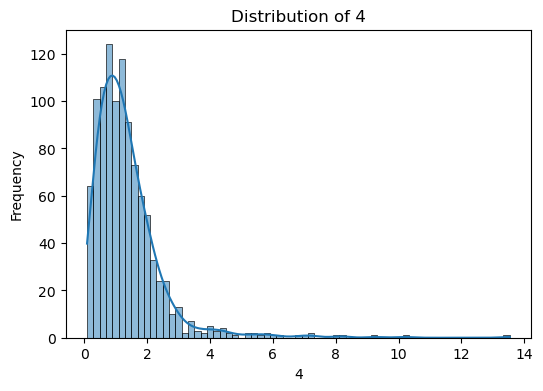

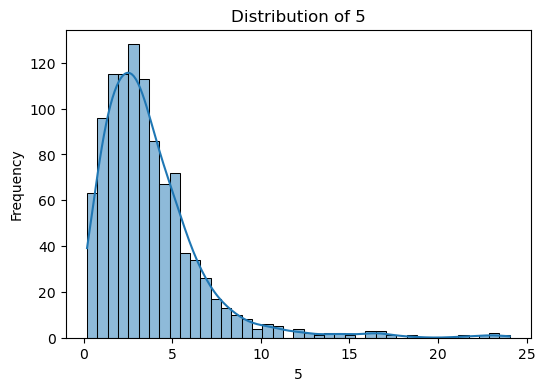

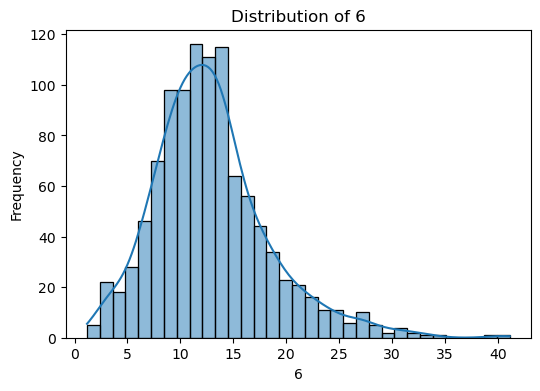

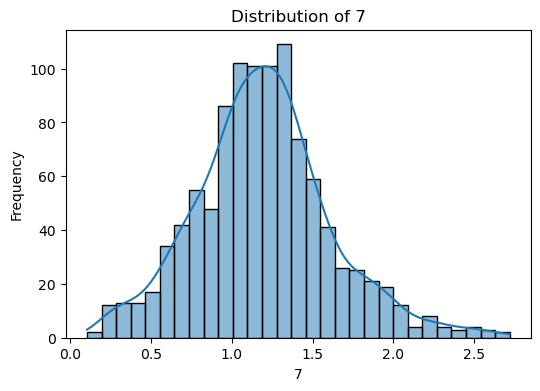

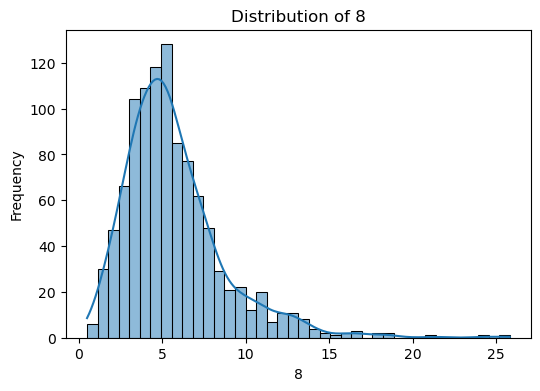

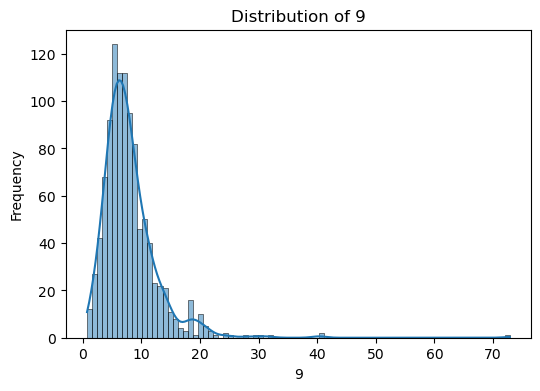

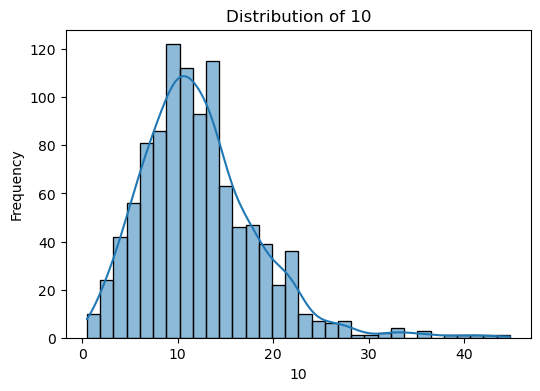

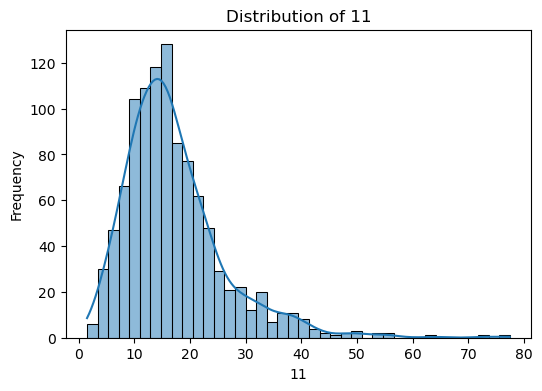

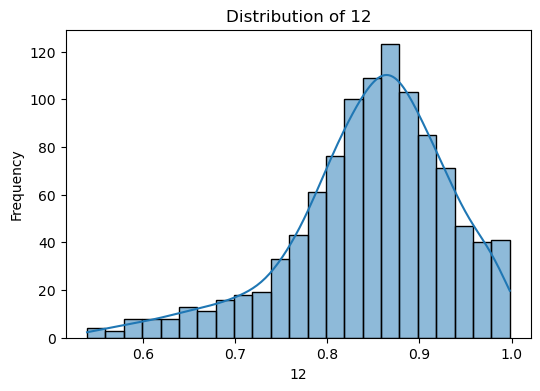

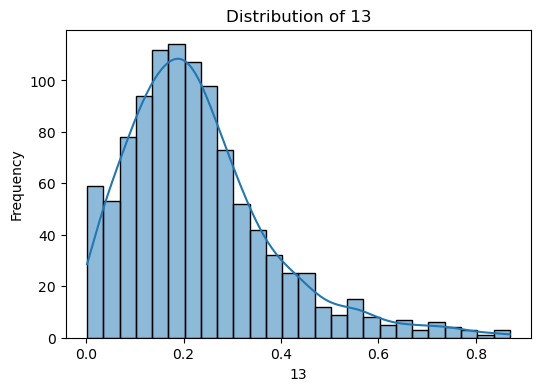

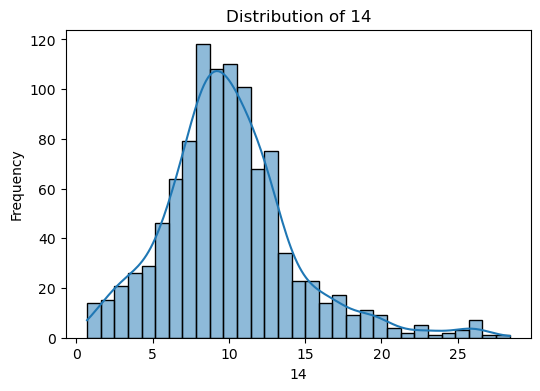

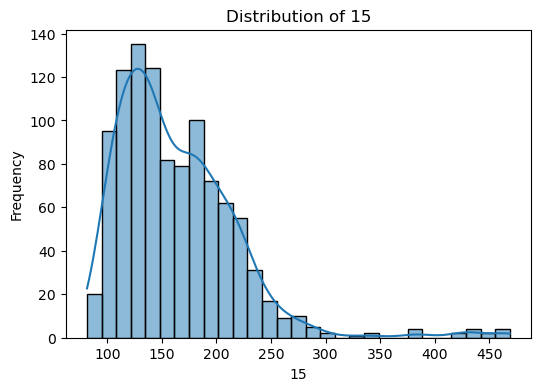

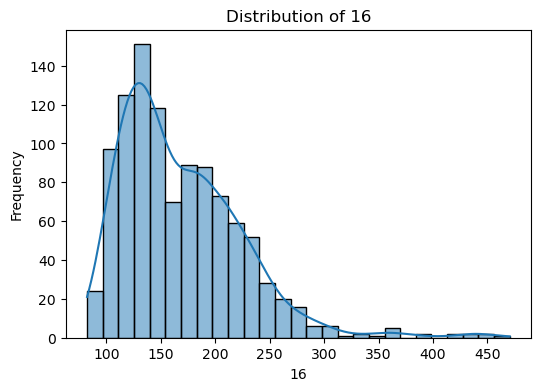

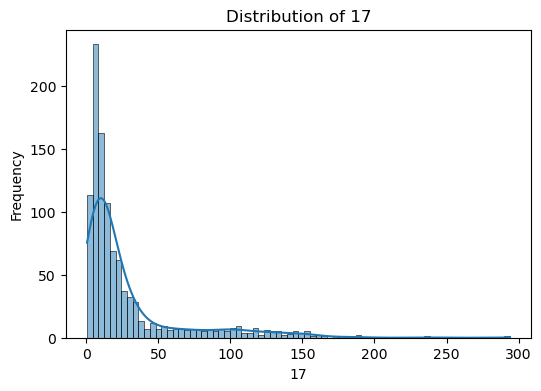

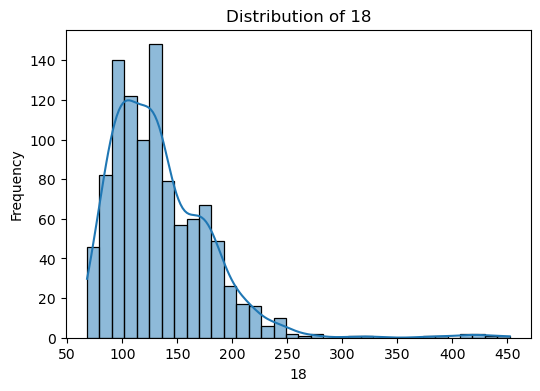

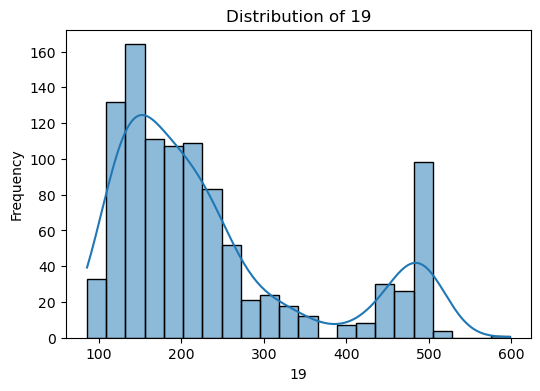

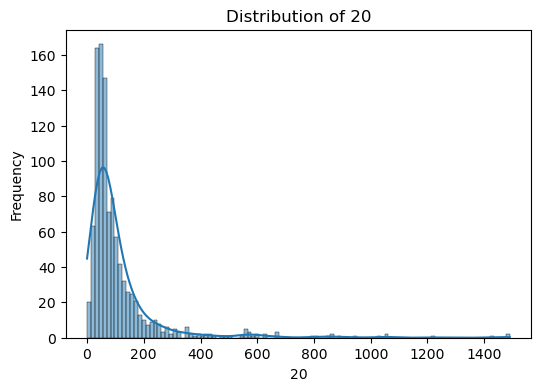

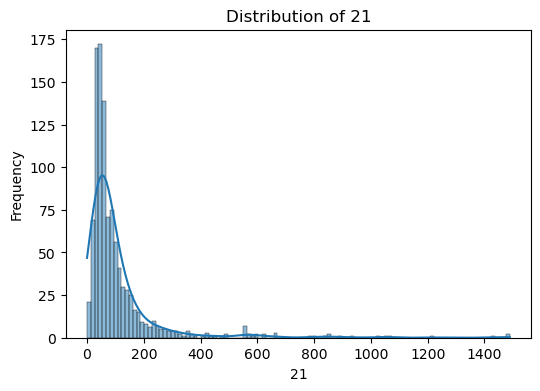

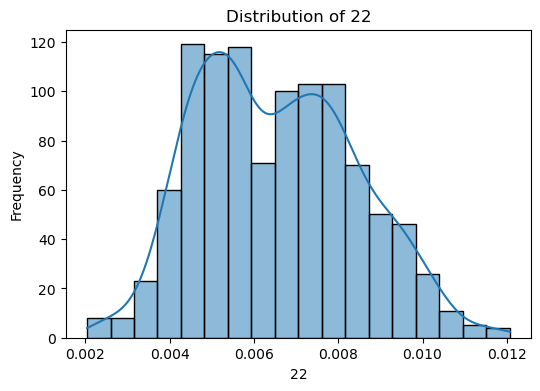

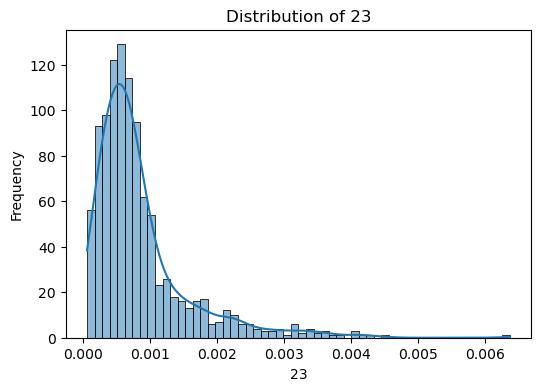

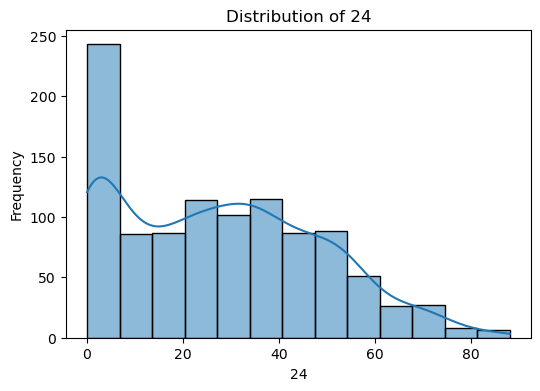

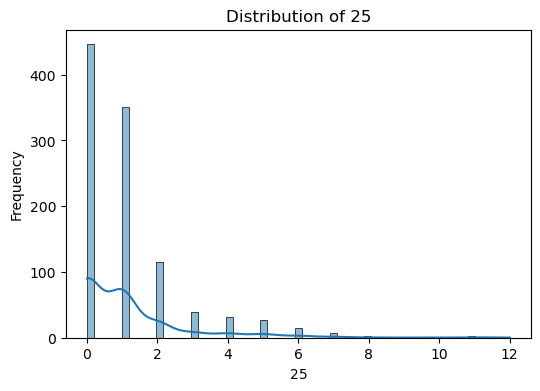

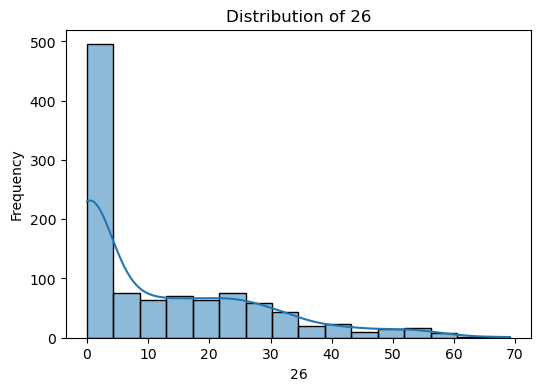

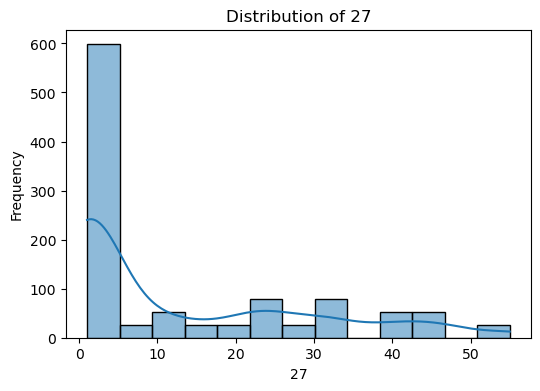

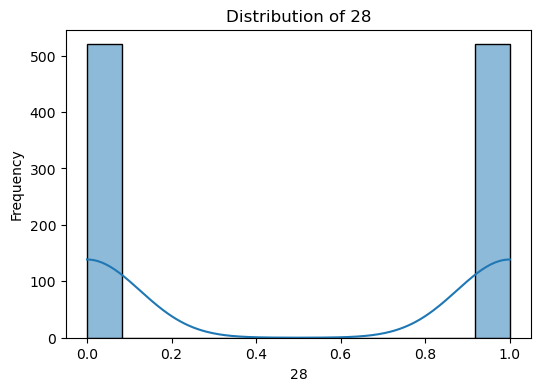

In [7]:
# Iterate through each column and plot its distribution
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [8]:
#TTest

In [9]:
import math
from scipy.stats import norm

def perform_hypothesis_test(df, column_name, column_stirng_name, significance_level=0.05):
    M_mean = df.loc[df[28] == 1, column_name].mean()
    F_mean = df.loc[df[28] == 0, column_name].mean()
    M_std = df.loc[df[28] == 1, column_name].std()
    F_std = df.loc[df[28] == 0, column_name].std()
    no_of_M = df.loc[df[28] == 1, column_name].count()
    no_of_F = df.loc[df[28] == 0, column_name].count()

    def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
        pooledSE = math.sqrt(sd1**2 / n1 + sd2**2 / n2)
        z = ((X1 - X2) - mudiff) / pooledSE
        pval = 2 * (1 - norm.cdf(abs(z)))
        return round(z, 3), pval

    z, p = twoSampZ(M_mean, F_mean, 0, M_std, F_std, no_of_M, no_of_F)

    null_hypothesis = f"There is no significant difference between the mean \"{column_stirng_name}\" of PD and healthy subjects."
    alternate_hypothesis = f"There is a significant difference between the mean \"{column_stirng_name}\" of PD and healthy subjects."

    
    if p < significance_level:
        pass
        # print("\nWe reject the null hypothesis")
    else:
        print('\n\n----------------------------------')
        print("- Null Hypothesis:", null_hypothesis)
        print("- Alternate Hypothesis:", alternate_hypothesis)
        
        print(f'\nZ = {z}, p = {p}')
        print("\nWe accept the null hypothesis")

In [10]:
perform_hypothesis_test(df, 1, 'Jitter in %')
perform_hypothesis_test(df, 2, 'Absolute jitter in microseconds')
perform_hypothesis_test(df, 3, 'r.a.p.')
perform_hypothesis_test(df, 4, 'p.p.q.5')
perform_hypothesis_test(df, 5, 'd.d.p.')
perform_hypothesis_test(df, 6, 'Shimmer in %')




----------------------------------
- Null Hypothesis: There is no significant difference between the mean "Shimmer in %" of PD and healthy subjects.
- Alternate Hypothesis: There is a significant difference between the mean "Shimmer in %" of PD and healthy subjects.

Z = 0.292, p = 0.7703050457769589

We accept the null hypothesis


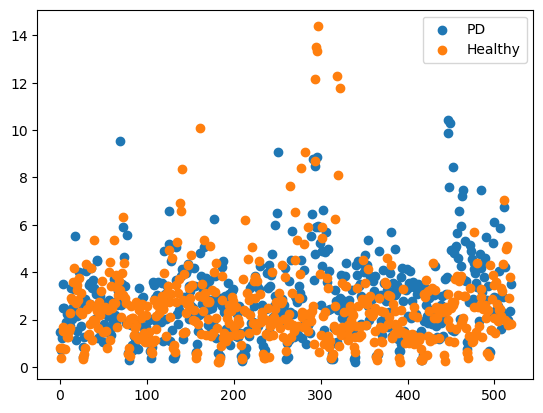

In [11]:
plt.scatter( range(len(df[df[28]==1][1])), df[df[28]==1][1], label='PD')
plt.scatter( range(len(df[df[28]==0][1])), df[df[28]==0][1], label='Healthy')
plt.legend()
plt.show()

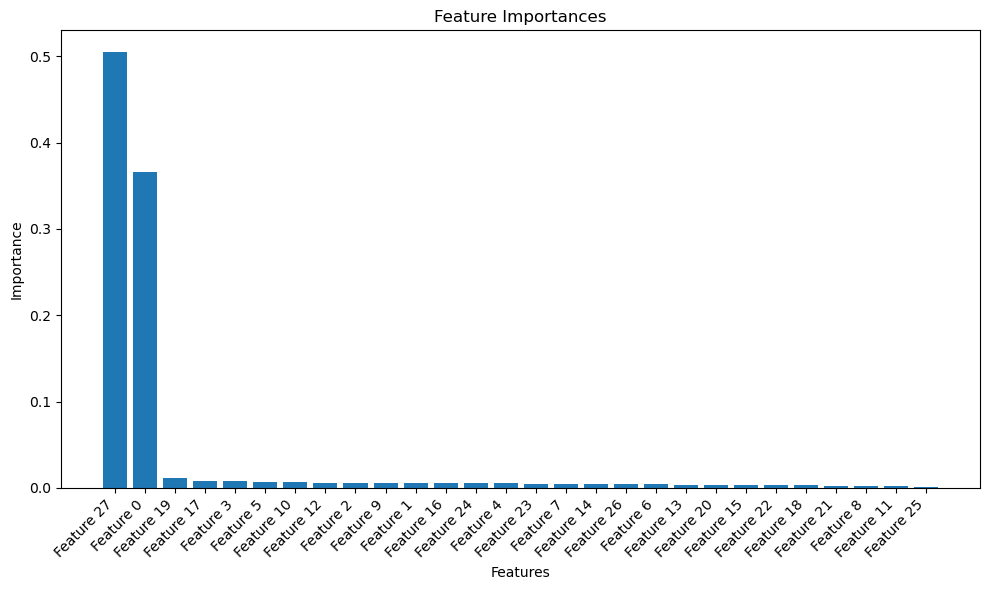

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load your data and split it into features (X) and target (y)
X, y = df.drop(28,axis=1), df[28]

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Sort indices based on importance
indices = np.argsort(importances)[::-1]

# Feature names (replace with your actual feature names)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()

plt.show()


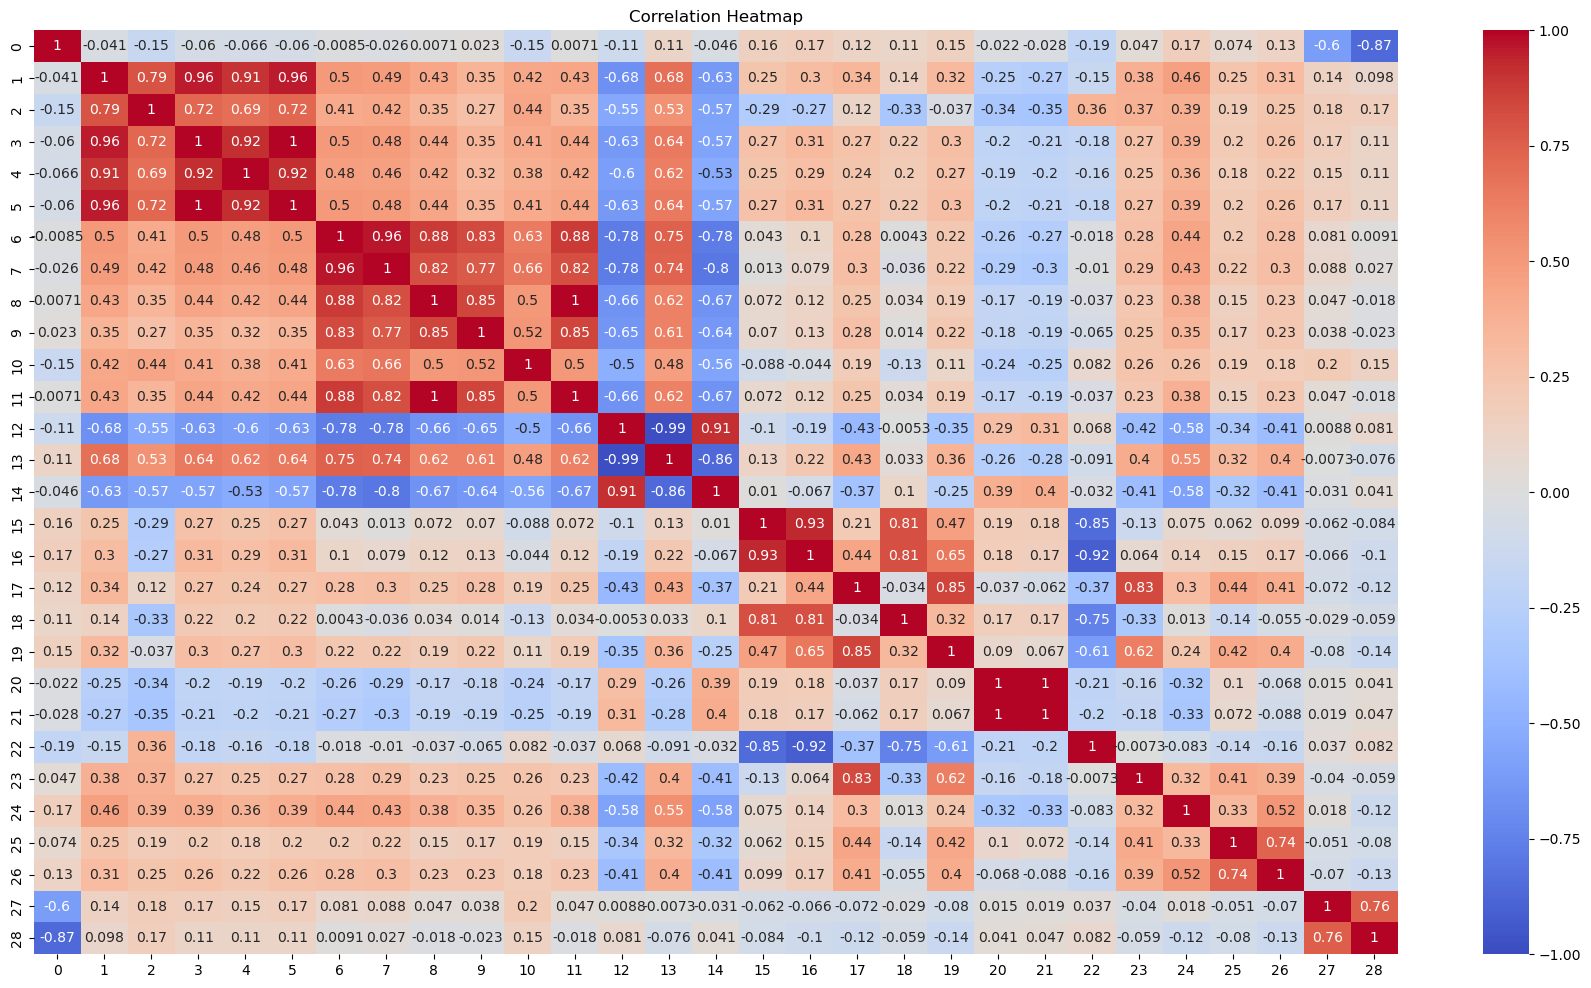

In [13]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 12))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [16]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,NaN,-0.040571,-0.151738,-0.060465,-0.066361,-0.060465,-0.008484,-0.026167,0.007070,0.022538,...,0.154136,-0.021695,-0.027577,-0.186040,0.046831,0.170824,0.074009,0.125489,-0.602401,-0.866296
1,NaN,NaN,0.791693,0.955695,0.906154,0.955694,0.498113,0.490327,0.434851,0.352898,...,0.318758,-0.254562,-0.269148,-0.151866,0.375978,0.464826,0.251289,0.312365,0.140326,0.097552
2,NaN,NaN,NaN,0.724970,0.691153,0.724970,0.413634,0.424462,0.350243,0.274999,...,-0.036702,-0.340791,-0.345273,0.357982,0.370202,0.388623,0.187589,0.245861,0.177695,0.166999
3,NaN,NaN,NaN,NaN,0.915695,1.000000,0.499045,0.484393,0.440373,0.345303,...,0.296577,-0.195857,-0.208542,-0.179820,0.265801,0.392331,0.200454,0.262853,0.165626,0.111144
4,NaN,NaN,NaN,NaN,NaN,0.915695,0.475906,0.461335,0.419708,0.316597,...,0.267908,-0.186628,-0.197998,-0.163408,0.251063,0.364609,0.184184,0.219275,0.152835,0.110934
5,NaN,NaN,NaN,NaN,NaN,NaN,0.499047,0.484395,0.440374,0.345306,...,0.296586,-0.195850,-0.208536,-0.179809,0.265812,0.392328,0.200468,0.262860,0.165632,0.111138
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.963551,0.882122,0.830953,...,0.223785,-0.255359,-0.269455,-0.017658,0.275186,0.441514,0.197883,0.277248,0.080626,0.009062
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817004,0.771766,...,0.222664,-0.287413,-0.301042,-0.010253,0.291130,0.430987,0.219295,0.295757,0.088111,0.027190
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845950,...,0.193433,-0.172035,-0.185487,-0.036735,0.227394,0.377617,0.150580,0.231756,0.046692,-0.018156
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.221337,-0.178726,-0.192401,-0.065328,0.245744,0.348894,0.168097,0.227661,0.038167,-0.022581


In [17]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)


[3, 4, 5, 7, 11, 14, 16, 21]
